In [22]:
# !rm -rf ELEC542-InstructP2P

In [1]:
!git clone https://github.com/JuanseHevia/ELEC542-InstructP2P.git

Cloning into 'ELEC542-InstructP2P'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 3), reused 24 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 1.56 MiB | 6.04 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
%cd ELEC542-InstructP2P/

/content/ELEC542-InstructP2P


In [3]:
# load data from zip file
!gdown 1hbaN9NtSYZphj6PNkcwXy18J4sg92irk -O data.zip
!unzip data.zip

Downloading...
From (original): https://drive.google.com/uc?id=1hbaN9NtSYZphj6PNkcwXy18J4sg92irk
From (redirected): https://drive.google.com/uc?id=1hbaN9NtSYZphj6PNkcwXy18J4sg92irk&confirm=t&uuid=7c739319-c003-4548-8bfd-41ee6302d826
To: /content/ELEC542-InstructP2P/data.zip
100% 2.51G/2.51G [00:28<00:00, 86.7MB/s]
Archive:  data.zip
   creating: test/
   creating: test/images/
   creating: test/images/242679/
  inflating: test/images/242679/242679-input.png  
  inflating: test/images/242679/242679-mask1.png  
  inflating: test/images/242679/242679-output1.png  
   creating: test/images/368667/
  inflating: test/images/368667/368667-input.png  
  inflating: test/images/368667/368667-mask1.png  
  inflating: test/images/368667/368667-output1.png  
  inflating: test/images/368667/368667-mask2.png  
  inflating: test/images/368667/368667-output2.png  
  inflating: test/images/368667/368667-mask3.png  
  inflating: test/images/368667/368667-output3.png  
   creating: test/images/385042/
  i

In [4]:
%cd ELEC542-InstructP2P/

[Errno 2] No such file or directory: 'ELEC542-InstructP2P/'
/content/ELEC542-InstructP2P


In [5]:
import utils

In [6]:
dataset = utils.MBDataset(data_dir="test")

Loading edit turns...


100%|██████████| 1053/1053 [00:00<00:00, 284135.49it/s]


In [7]:
dataset[0].to_json()

{'input': '242679-input.png',
 'output': '242679-output1.png',
 'mask': '242679-mask1.png',
 'instruction': 'Put a cat on the seat.',
 'desdcription': 'A seat under a mirror onboard a train, next to a cluttered counter.'}

In [8]:
evaluation_dataset = dataset.build_evaluation_dataset()

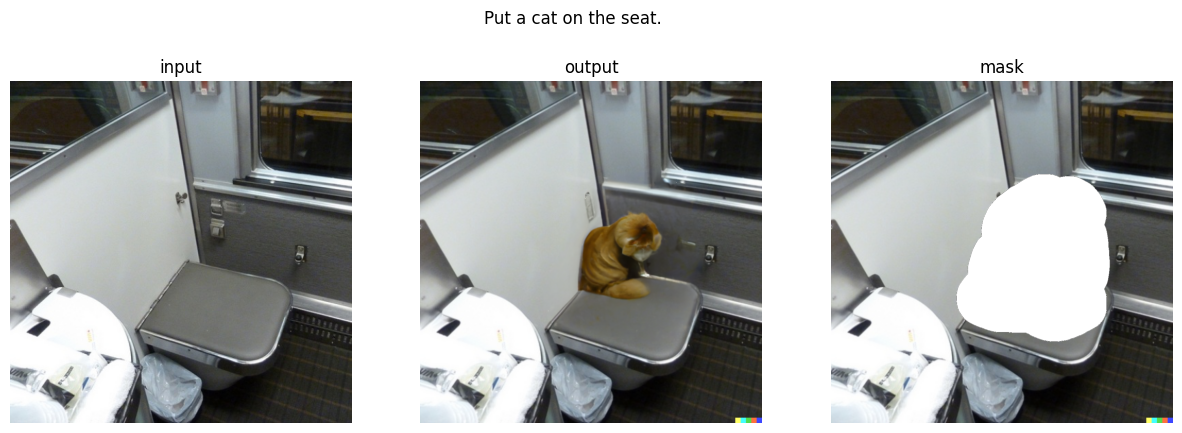

In [9]:
dataset.plot(0)

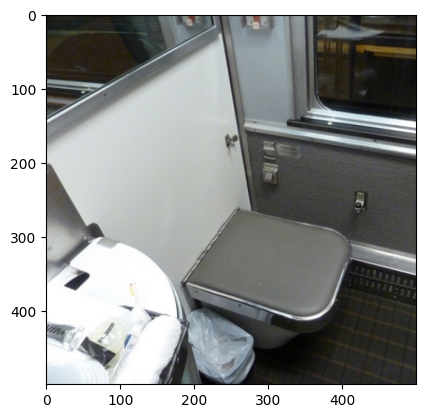

In [10]:
import matplotlib.pyplot as plt
path = evaluation_dataset.iloc[0].path
plt.imshow(plt.imread(path))

In [14]:
_ = plt.imread(path)
_.shape

(500, 500, 3)

In [11]:
# run IP2P pipeline
from diffusers import StableDiffusionInstructPix2PixPipeline
import torch

pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix", torch_dtype=torch.float16
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [12]:
pipe.to("cuda")

StableDiffusionInstructPix2PixPipeline {
  "_class_name": "StableDiffusionInstructPix2PixPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "timbrooks/instruct-pix2pix",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
import json
from tqdm import tqdm
import os
from PIL import Image

SAVEDIR = "results/"
NUM_INFERENCE_STEPS = 25
os.makedirs(SAVEDIR, exist_ok=True)

results_json = []

for idx, row in tqdm(evaluation_dataset.iterrows()):
  img_path = row.path
  prompt = row.prompt

  # read image
  _input_image = Image.open(img_path)
  _input_image = _input_image.convert("RGB")
  img = _input_image.resize((512, 512))

  images = pipe(prompt=prompt, image=_input_image,
                num_inference_steps=NUM_INFERENCE_STEPS).images

  for i, img in enumerate(images):
    fname = f"EDS{idx}_{i}.png"
    img.save(os.path.join(SAVEDIR, fname))
    results_json.append({
      "path": fname,
      "prompt": prompt,
      "evaluation_dataset_idx": idx,
      "generation_idx": i
    })


  # checkpoint every 250 generations
  if idx % 500 == 0:
    with open(f"results-{idx}.json", "w") as f:
      json.dump(results_json, f)

0it [00:00, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

1it [00:05,  5.43s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

2it [00:10,  5.42s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

3it [00:16,  5.45s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

4it [00:21,  5.47s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

5it [00:27,  5.54s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

6it [00:33,  5.56s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

7it [00:38,  5.56s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

8it [00:44,  5.60s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

9it [00:50,  5.62s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

10it [00:55,  5.64s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

11it [01:01,  5.64s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

12it [01:07,  5.65s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

13it [01:12,  5.67s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

14it [01:18,  5.69s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

15it [01:24,  5.72s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

16it [01:30,  5.76s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

17it [01:36,  5.80s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

18it [01:41,  5.84s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

19it [01:47,  5.87s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

20it [01:53,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

21it [01:59,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

22it [02:05,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

23it [02:11,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

24it [02:17,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

25it [02:23,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

26it [02:29,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

27it [02:35,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

28it [02:41,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

29it [02:47,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

30it [02:53,  5.89s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

31it [02:58,  5.89s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

32it [03:04,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

33it [03:10,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

34it [03:16,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

35it [03:22,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

36it [03:28,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

37it [03:34,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

38it [03:40,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

39it [03:46,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

40it [03:52,  5.95s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

41it [03:58,  5.95s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

42it [04:04,  5.95s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

43it [04:10,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

44it [04:16,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

45it [04:21,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

46it [04:27,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

47it [04:33,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

48it [04:39,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

49it [04:45,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

50it [04:51,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

51it [04:57,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

52it [05:03,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

53it [05:09,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

54it [05:15,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

55it [05:21,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

56it [05:27,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

57it [05:33,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

58it [05:38,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

59it [05:44,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

60it [05:50,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

61it [05:56,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

62it [06:02,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

63it [06:08,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

64it [06:14,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

65it [06:20,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

66it [06:26,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

67it [06:32,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

68it [06:38,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

69it [06:43,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

70it [06:49,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

71it [06:55,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

72it [07:01,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

73it [07:07,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

74it [07:13,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

75it [07:19,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

76it [07:25,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

77it [07:31,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

78it [07:37,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

79it [07:42,  5.89s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

80it [07:48,  5.89s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

81it [07:54,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

82it [08:00,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

83it [08:06,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

84it [08:12,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

85it [08:18,  5.95s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

86it [08:24,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

87it [08:30,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

88it [08:36,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

89it [08:42,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

90it [08:48,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

91it [08:54,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

92it [09:00,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

93it [09:05,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

94it [09:11,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

95it [09:17,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

96it [09:23,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

97it [09:29,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

98it [09:35,  5.94s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

99it [09:41,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

100it [09:47,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

101it [09:53,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

102it [09:59,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

103it [10:05,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

104it [10:11,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

105it [10:17,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

106it [10:22,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

107it [10:28,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

108it [10:34,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

109it [10:40,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

110it [10:46,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

111it [10:52,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

112it [10:58,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

113it [11:04,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

114it [11:10,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

115it [11:16,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

116it [11:22,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

117it [11:28,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

118it [11:33,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

119it [11:39,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

120it [11:45,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

121it [11:51,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

122it [11:57,  5.93s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

123it [12:03,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

124it [12:09,  5.92s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

125it [12:15,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

126it [12:21,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

127it [12:27,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

128it [12:33,  5.89s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

129it [12:39,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

130it [12:44,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

131it [12:50,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

132it [12:56,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

133it [13:02,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

134it [13:08,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

135it [13:14,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

136it [13:20,  5.89s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

137it [13:26,  5.89s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

138it [13:32,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

139it [13:38,  5.90s/it]

  0%|          | 0/25 [00:00<?, ?it/s]

140it [13:43,  5.91s/it]

  0%|          | 0/25 [00:00<?, ?it/s]